# Flight price prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
train=pd.read_excel('C:\\Users\\Dell\\Downloads\\Data_Train.xlsx')
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [43]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [44]:
# droping the null value

train.dropna(inplace=True)

In [45]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [46]:
train.shape

(10682, 11)

# EDA

### handeling date time

In [47]:
train['Date_of_Journey']=pd.to_datetime(arg=train['Date_of_Journey'],format="%d/%m/%Y")

In [48]:
train['Date_of_Journey']

0       2019-03-24
1       2019-05-01
2       2019-06-09
3       2019-05-12
4       2019-03-01
           ...    
10678   2019-04-09
10679   2019-04-27
10680   2019-04-27
10681   2019-03-01
10682   2019-05-09
Name: Date_of_Journey, Length: 10682, dtype: datetime64[ns]

In [49]:
train['journey_day']=pd.to_datetime(arg=train['Date_of_Journey'],format="%d/%m/%Y").dt.day
train['journey_month']=pd.to_datetime(arg=train['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [50]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [51]:
train['journey_year']=pd.to_datetime(arg=train['Date_of_Journey'],format="%d/%m/%Y").dt.year
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [52]:
train.drop(columns='Date_of_Journey',inplace=True)
train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [53]:
train['dep_hour']=pd.to_datetime(arg=train['Dep_Time']).dt.hour
train['dep_minute']=pd.to_datetime(arg=train['Dep_Time']).dt.minute
train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,dep_hour,dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [54]:
train.drop(columns='Dep_Time',inplace=True)
train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,dep_hour,dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [55]:
train['arrival_hour']=pd.to_datetime(arg=train['Arrival_Time']).dt.hour
train['arrival_minute']=pd.to_datetime(arg=train['Arrival_Time']).dt.minute

In [56]:
train.drop(columns='Arrival_Time',inplace=True)
train.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,dep_hour,dep_minute,arrival_hour,arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10


In [57]:
train['duration_hour']=0
train['duration_minute']=0

In [58]:
duration=list(train['Duration'])
for i in range(len(duration)):
    l=duration[i].split(' ')
    if len(l)==2:
        s=l[0][:-1]
        train['duration_hour'].iloc[i]=int(l[0][:-1])
        train['duration_minute'].iloc[i]=int(l[1][:-1])
    elif len(l)==1:
        if 'h' in l[0]:
            train['duration_hour'].iloc[i]=int(l[0][:-1])
            
        if 'm' in l[0]:
            train['duration_minute'].iloc[i]=int(l[0][:-1])
        

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [59]:
train.dtypes

Airline            object
Source             object
Destination        object
Route              object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
journey_day         int64
journey_month       int64
journey_year        int64
dep_hour            int64
dep_minute          int64
arrival_hour        int64
arrival_minute      int64
duration_hour       int64
duration_minute     int64
dtype: object

In [60]:
train.drop(columns='Duration',inplace=True)
train.tail()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hour,duration_minute
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,2019,11,30,14,10,2,40
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,2 stops,No info,11753,9,5,2019,10,55,19,15,8,20


### handeling categorical data

<AxesSubplot:xlabel='Airline', ylabel='Price'>

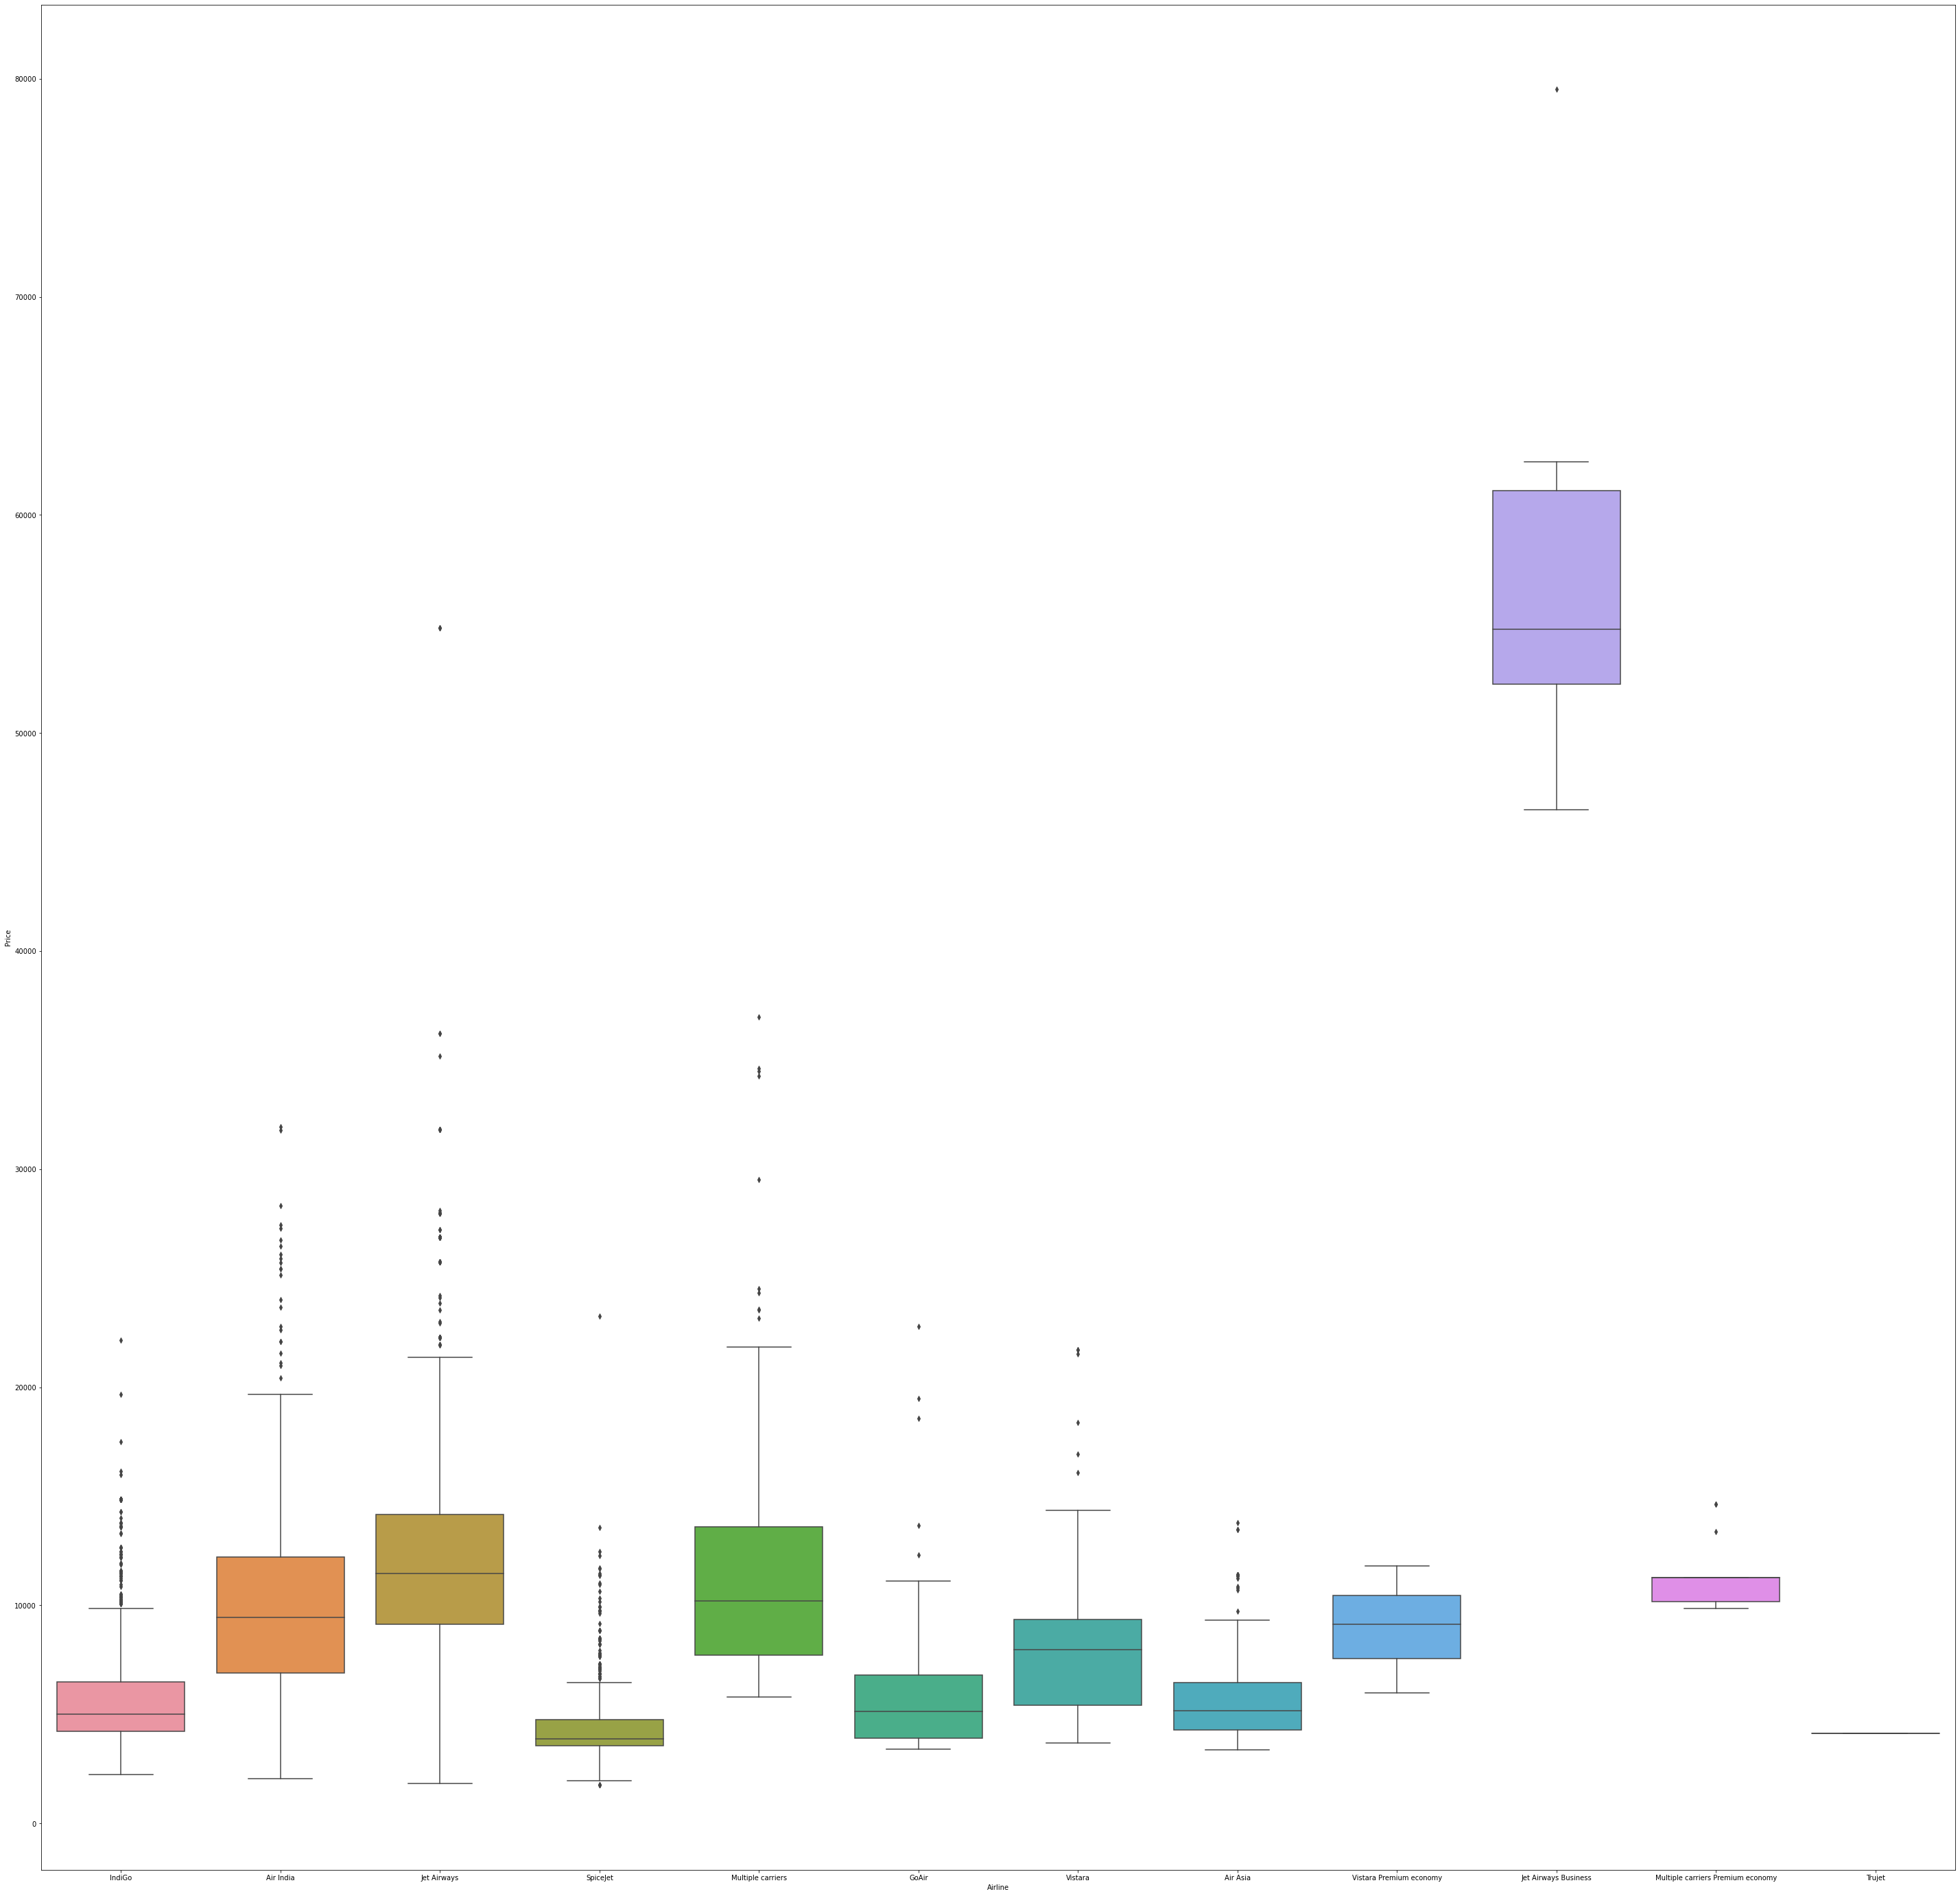

In [61]:
# nominal data, no ordered data, we use one-hot-encoding
# ordinal data, ordered data, we use level-encoding
plt.figure(figsize=(50,50))

sns.boxplot(x='Airline', y='Price',data=train)

In [62]:
train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [63]:
# airline is nominal data so we apply one-hot-encoding

d={'Jet Airways':0,'IndiGo':1,'Air India':2,'Multiple carriers':3,'SpiceJet':4,'Vistara':5,'Air Asia':6,'GoAir':7,
  'Multiple carriers Premium economy':8,'Jet Airways Business':9,'Vistara Premium economy':10,'Trujet':11}
train['airline']=train['Airline'].replace(d)
train['airline']

0        1
1        2
2        0
3        1
4        1
        ..
10678    6
10679    2
10680    0
10681    5
10682    2
Name: airline, Length: 10682, dtype: int64

In [64]:
train.drop(columns='Airline',inplace=True)
train.head()

,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hour,duration_minute,airline
0,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,1
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,2
2,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25,1
4,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45,1


In [65]:
train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [66]:
d1={'Delhi':0,'Kolkata':1,'Banglore':2,'Mumbai':3,'Chennai':4}
train['source']=train['Source'].replace(d1)
train.drop(columns='Source', inplace=True)
train.head()

,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hour,duration_minute,airline,source
0,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,1,2
1,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,2,1
2,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,0,0
3,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25,1,1
4,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45,1,2


In [67]:
train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [68]:
d2={'Cochin':0,'Banglore':1,'Delhi':2,'New Delhi':3,'Hyderabad':4,'Kolkata':5}
train['destination']=train['Destination'].replace(d2)
train.drop(columns='Destination', inplace=True)
train.head()

,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hour,duration_minute,airline,source,destination
0,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,1,2,3
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,2,1,1
2,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,0,0,0
3,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25,1,1,1
4,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45,1,2,3


In [69]:
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [70]:
d3={'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}
train['total_stops']=train['Total_Stops'].replace(d3)
train.drop(columns='Total_Stops',inplace=True)
train.drop(columns=['Additional_Info','Route'],inplace=True)
train.head()

,Price,journey_day,journey_month,journey_year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hour,duration_minute,airline,source,destination,total_stops
0,3897,24,3,2019,22,20,1,10,2,50,1,2,3,0
1,7662,1,5,2019,5,50,13,15,7,25,2,1,1,2
2,13882,9,6,2019,9,25,4,25,19,0,0,0,0,2
3,6218,12,5,2019,18,5,23,30,5,25,1,1,1,1
4,13302,1,3,2019,16,50,21,35,4,45,1,2,3,1


In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Price            10682 non-null  int64
 1   journey_day      10682 non-null  int64
 2   journey_month    10682 non-null  int64
 3   journey_year     10682 non-null  int64
 4   dep_hour         10682 non-null  int64
 5   dep_minute       10682 non-null  int64
 6   arrival_hour     10682 non-null  int64
 7   arrival_minute   10682 non-null  int64
 8   duration_hour    10682 non-null  int64
 9   duration_minute  10682 non-null  int64
 10  airline          10682 non-null  int64
 11  source           10682 non-null  int64
 12  destination      10682 non-null  int64
 13  total_stops      10682 non-null  int64
dtypes: int64(14)
memory usage: 1.5 MB


In [76]:
train.corr()

,Price,journey_day,journey_month,journey_year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hour,duration_minute,airline,source,destination,total_stops
Price,1.000000,-0.153774,-0.103643,NaN,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855,-0.280875,-0.358978,-0.304826,0.603897
journey_day,-0.153774,1.000000,-0.038359,NaN,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940,0.017563,-0.066410,-0.068173,-0.009451
journey_month,-0.103643,-0.038359,1.000000,NaN,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897,-0.031411,-0.167047,-0.226290,0.054383
journey_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dep_hour,0.006799,0.002170,0.039127,NaN,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707,-0.068034,0.035173,0.017964,-0.061476
dep_minute,-0.024458,-0.008170,-0.059267,NaN,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485,0.057397,0.117637,0.128105,-0.002618
arrival_hour,0.024244,-0.003245,-0.003927,NaN,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309,0.032599,-0.028430,-0.029796,0.038140
arrival_minute,-0.086155,-0.017510,-0.100626,NaN,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628,0.085010,0.148661,0.129915,-0.106940
duration_hour,0.508778,-0.022059,0.016141,NaN,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468,-0.245756,-0.434206,-0.401697,0.739916
duration_minute,-0.124855,-0.008940,-0.040897,NaN,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000,0.078928,0.095355,0.073796,-0.136706


In [79]:
train.drop(columns='journey_year',inplace=True)

KeyError: "['journey_year'] not found in axis"

# test data

In [78]:
test=pd.read_excel('C:\\Users\\Dell\\Downloads\\Test_set.xlsx')
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [82]:
test.dropna(inplace=True)
test['Date_of_Journey']=pd.to_datetime(arg=test['Date_of_Journey'],format="%d/%m/%Y")
test['journey_day']=pd.to_datetime(arg=test['Date_of_Journey'],format="%d/%m/%Y").dt.day
test['journey_month']=pd.to_datetime(arg=test['Date_of_Journey'],format="%d/%m/%Y").dt.month
test.drop(columns='Date_of_Journey',inplace=True)
test['dep_hour']=pd.to_datetime(arg=test['Dep_Time']).dt.hour
test['dep_minute']=pd.to_datetime(arg=test['Dep_Time']).dt.minute
test.drop(columns='Dep_Time',inplace=True)
test['arrival_hour']=pd.to_datetime(arg=test['Arrival_Time']).dt.hour
test['arrival_minute']=pd.to_datetime(arg=test['Arrival_Time']).dt.minute
test.drop(columns='Arrival_Time',inplace=True)
test['duration_hour']=0
test['duration_minute']=0
duration=list(test['Duration'])
for i in range(len(duration)):
    l=duration[i].split(' ')
    if len(l)==2:
        s=l[0][:-1]
        test['duration_hour'].iloc[i]=int(l[0][:-1])
        test['duration_minute'].iloc[i]=int(l[1][:-1])
    elif len(l)==1:
        if 'h' in l[0]:
            test['duration_hour'].iloc[i]=int(l[0][:-1])
            
        if 'm' in l[0]:
            test['duration_minute'].iloc[i]=int(l[0][:-1])
test.drop(columns='Duration',inplace=True)
d={'Jet Airways':0,'IndiGo':1,'Air India':2,'Multiple carriers':3,'SpiceJet':4,'Vistara':5,'Air Asia':6,'GoAir':7,
  'Multiple carriers Premium economy':8,'Jet Airways Business':9,'Vistara Premium economy':10,'Trujet':11}
test['airline']=test['Airline'].replace(d)
test.drop(columns='Airline',inplace=True)
d1={'Delhi':0,'Kolkata':1,'Banglore':2,'Mumbai':3,'Chennai':4}
test['source']=test['Source'].replace(d1)
test.drop(columns='Source', inplace=True)
d2={'Cochin':0,'Banglore':1,'Delhi':2,'New Delhi':3,'Hyderabad':4,'Kolkata':5}
test['destination']=test['Destination'].replace(d2)
test.drop(columns='Destination', inplace=True)
d3={'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}
test['total_stops']=test['Total_Stops'].replace(d3)
test.drop(columns='Total_Stops',inplace=True)
test.drop(columns=['Additional_Info','Route'],inplace=True)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [83]:
test

,journey_day,journey_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hour,duration_minute,airline,source,destination,total_stops
0,6,6,17,30,4,25,10,55,0,0,0,1
1,12,5,6,20,10,20,4,0,1,1,1,1
2,21,5,19,15,19,0,23,45,0,0,0,1
3,21,5,8,0,21,0,13,0,3,0,0,1
4,24,6,23,55,2,45,2,50,6,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,6,6,20,30,20,25,23,55,2,1,1,1
2667,27,3,14,20,16,55,2,35,1,1,1,0
2668,6,3,21,50,4,25,6,35,0,0,0,1
2669,6,3,4,0,19,15,15,15,2,0,0,1


In [84]:
train

,Price,journey_day,journey_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hour,duration_minute,airline,source,destination,total_stops
0,3897,24,3,22,20,1,10,2,50,1,2,3,0
1,7662,1,5,5,50,13,15,7,25,2,1,1,2
2,13882,9,6,9,25,4,25,19,0,0,0,0,2
3,6218,12,5,18,5,23,30,5,25,1,1,1,1
4,13302,1,3,16,50,21,35,4,45,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4107,9,4,19,55,22,25,2,30,6,1,1,0
10679,4145,27,4,20,45,23,20,2,35,2,1,1,0
10680,7229,27,4,8,20,11,20,3,0,0,2,2,0
10681,12648,1,3,11,30,14,10,2,40,5,2,3,0


In [85]:
train.to_csv("airline_price_training.csv")
test.to_csv("airline_price_testing.csv")

In [3]:
test=pd.read_csv('airline_price_testing.csv')
test.drop(columns='Unnamed: 0',inplace=True)
train=pd.read_csv('airline_price_training.csv')
train.drop(columns='Unnamed: 0',inplace=True)

In [4]:
train

,Price,journey_day,journey_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hour,duration_minute,airline,source,destination,total_stops
0,3897,24,3,22,20,1,10,2,50,1,2,3,0
1,7662,1,5,5,50,13,15,7,25,2,1,1,2
2,13882,9,6,9,25,4,25,19,0,0,0,0,2
3,6218,12,5,18,5,23,30,5,25,1,1,1,1
4,13302,1,3,16,50,21,35,4,45,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,4107,9,4,19,55,22,25,2,30,6,1,1,0
10678,4145,27,4,20,45,23,20,2,35,2,1,1,0
10679,7229,27,4,8,20,11,20,3,0,0,2,2,0
10680,12648,1,3,11,30,14,10,2,40,5,2,3,0


In [5]:
test

,journey_day,journey_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hour,duration_minute,airline,source,destination,total_stops
0,6,6,17,30,4,25,10,55,0,0,0,1
1,12,5,6,20,10,20,4,0,1,1,1,1
2,21,5,19,15,19,0,23,45,0,0,0,1
3,21,5,8,0,21,0,13,0,3,0,0,1
4,24,6,23,55,2,45,2,50,6,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,6,6,20,30,20,25,23,55,2,1,1,1
2667,27,3,14,20,16,55,2,35,1,1,1,0
2668,6,3,21,50,4,25,6,35,0,0,0,1
2669,6,3,4,0,19,15,15,15,2,0,0,1


In [6]:
x=train.drop(columns='Price')
y=train['Price']

In [7]:
x

,journey_day,journey_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hour,duration_minute,airline,source,destination,total_stops
0,24,3,22,20,1,10,2,50,1,2,3,0
1,1,5,5,50,13,15,7,25,2,1,1,2
2,9,6,9,25,4,25,19,0,0,0,0,2
3,12,5,18,5,23,30,5,25,1,1,1,1
4,1,3,16,50,21,35,4,45,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,9,4,19,55,22,25,2,30,6,1,1,0
10678,27,4,20,45,23,20,2,35,2,1,1,0
10679,27,4,8,20,11,20,3,0,0,2,2,0
10680,1,3,11,30,14,10,2,40,5,2,3,0


In [8]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10677     4107
10678     4145
10679     7229
10680    12648
10681    11753
Name: Price, Length: 10682, dtype: int64

In [8]:
from sklearn.ensemble import ExtraTreesRegressor
ex=ExtraTreesRegressor()
ex.fit(x,y)

ExtraTreesRegressor()

In [12]:
l=pd.Series(data=ex.feature_importances_,index=x.columns)
l

journey_day        0.145091
journey_month      0.061590
dep_hour           0.027262
dep_minute         0.025113
arrival_hour       0.032995
arrival_minute     0.023328
duration_hour      0.143337
duration_minute    0.018496
airline            0.174152
source             0.026461
destination        0.041910
total_stops        0.280264
dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=30)

In [10]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor()
rf_reg.fit(x_train,y_train)

RandomForestRegressor()

In [11]:
rf_reg.score(x_test,y_test)

0.8018969895585228

In [12]:
rf_reg.score(x_train,y_train)

0.9552051441057584

In [14]:
y_pred=rf_reg.predict(x_test)

In [15]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.7842227865806928

In [16]:
import pickle
f=open('flight_price_model.pkl', 'wb')
pickle.dump(rf_reg,f)

In [17]:
model=open('flight_price_model.pkl','rb')
forest=pickle.load(model)

In [18]:
forest

RandomForestRegressor()

In [18]:
def get_duration(dep_hour,dep_minute,arrival_hour,arrival_minute):
    if arrival_hour<dep_hour:
        if arrival_minute < dep_minute:
            duration_hour=(arrival_hour+24)-dep_hour
            duration_hour=duration_hour-1
        if arrival_minute >= dep_minute:
            duration_hour=(arrival_hour+24)-dep_hour
    if arrival_hour>=dep_hour:
        if arrival_minute < dep_minute:
            duration_hour=(arrival_hour-dep_hour)-1
        if arrival_minute >= dep_minute:
            duration_hour=arrival_hour-dep_hour
    if arrival_minute<dep_minute:
        duration_minute=(arrival_minute+60)-dep_minute
    else:
        duration_minute=arrival_minute-dep_minute
    return duration_hour, duration_minute

In [19]:
get_duration(22,20,1,10)

(2, 50)

In [20]:
get_duration(5,50,13,15)

(7, 25)